#Gaussian bayes classifier

In this assignment we will use a Gaussian bayes classfier to classify our data points.

# Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report
from matplotlib import cm

# Load training data

Our data has 2D feature $x1, x2$. Data from the two classes is are in $\texttt{class1_train}$ and $\texttt{class2_train}$ respectively. Each file has two columns corresponding to the 2D feature.

In [0]:
class1_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class1_train').to_numpy()
class2_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class2_train').to_numpy()

In [16]:
class1_train[:10]

array([[0.32047805, 0.4810921 ],
       [0.050691  , 0.0963995 ],
       [3.74846984, 0.40393104],
       [2.25637447, 2.08996208],
       [1.42145382, 1.24362901],
       [0.40806271, 0.92481005],
       [1.60681941, 0.47526843],
       [1.57397678, 1.60394699],
       [1.7312145 , 2.43452464],
       [0.93069614, 0.21234576]])

In [17]:
class1_train.shape

(160, 2)

In [18]:
class2_train.shape

(39, 2)

# Visualize training data
Generate 2D scatter plot of the training data. Plot the points from class 1 in red and the points from class 2 in blue.

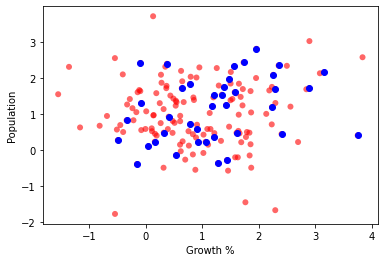

In [19]:
import seaborn as sns
classes = ['class-1','class-2']

for i in range(class1_train.shape[0]):
    
    plt.scatter(class1_train[i][0],class1_train[i][1] ,c="red",alpha=0.6, edgecolors='none')

    # plt.legend(loc='best', fontsize=16)
    plt.xlabel('Growth %')
    plt.ylabel('Population')

for j in range(class2_train.shape[0]):
    plt.scatter(class1_train[j][0],class1_train[j][1] ,c="blue")


# Maximum likelihood estimate of parameters

We will model the likelihood, $P(\mathbf{x}|C_1)$ and $P(\mathbf{x}|C_2)$ as $\mathcal{N}(\mathbf{\mu_1},\Sigma_1)$ and $\mathcal{N}(\mathbf{\mu_2},\Sigma_2)$ respectively. The prior probability of the classes are called, $P(C_1)=\pi_1$ and $P(C_2)=\pi_2$.

The maximum likelihood estimate of the parameters as follows:
\begin{align*}
\pi_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)}{N}\\
\mathbf{\mu_k} &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)\mathbf{x}^i}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\Sigma_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)(\mathbf{x}^i-\mathbf{\mu_k})(\mathbf{x}^i-\mathbf{\mu_k})^T}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\end{align*}

Here, $t^i$ is the target or class of $i^{th}$ sample. $\mathbb{1}(t^i=k)$ is 1 if $t^i=k$ and 0 otherwise.

Compute maximum likelihood values estimates of $\pi_1$, $\mu_1$, $\Sigma_1$ and $\pi_2$, $\mu_2$, $\Sigma_2$ 

Also print these values


$pi$ = `Prior` <br/>
$mu$ and $sigma$ = `Likelihood` 


In [20]:
def calculate_pi_1():
  num = class1_train.shape[0]
  deno = class1_train.shape[0] + class2_train.shape[0]
  return num/deno

def calculate_pi_2():
  num = class2_train.shape[0]
  deno = class1_train.shape[0] + class2_train.shape[0]
  return num/deno

def calculate_mu_1():
  return class1_train.mean(axis=0)

def calculate_mu_2():
  return class2_train.mean(axis=0)

def calculate_cov_1():
  x = class1_train
  print(x.shape)
  mu = x.mean(axis=0) 
  x_norm = x-mu
  x_transpose = x_norm.transpose()
  return np.cov(x_transpose)

def calculate_cov_2():
  x = class2_train
  print(x.shape)
  mu = x.mean(axis=0)
  x_norm = x-mu
  x_transpose = x_norm.transpose()
  return np.cov(x_transpose)


print( 'pi_1 : {} and pi_2 : {}'.format(calculate_pi_1(),calculate_pi_2()))
print( 'mu_1 : {} and mu_2 : {}'.format(calculate_mu_1(),calculate_mu_2()))
print( 'sigma_1 : \n{} \n sigma_2 : \n{}'.format(calculate_cov_1(),calculate_cov_2()))

pi_1 : 0.8040201005025126 and pi_2 : 0.19597989949748743
mu_1 : [0.96998989 1.02894917] and mu_2 : [-1.02482819 -0.91492055]
(160, 2)
(39, 2)
sigma_1 : 
[[0.96127884 0.07824879]
 [0.07824879 0.82105102]] 
 sigma_2 : 
[[1.1978678  0.48182629]
 [0.48182629 0.93767199]]


In [21]:
## Another way to get Pi , mu and sigma

pi1 = len(class1_train)/(len(class1_train)+len(class2_train))
pi2 = len(class2_train)/(len(class1_train)+len(class2_train))
mu1 = class1_train.mean(axis=0)
mu2 = class2_train.mean(axis=0)
sig1 = np.cov(class1_train,rowvar=False)
sig2 = np.cov(class2_train,rowvar=False)

print("Pi-1 {} and Pi-2 {}".format(pi1,pi2))
print("mu-1 {} and mu-2 {}".format(mu1,mu2))
print("sig-1 {} and sig-2 {}".format(sig1,sig2))


Pi-1 0.8040201005025126 and Pi-2 0.19597989949748743
mu-1 [0.96998989 1.02894917] and mu-2 [-1.02482819 -0.91492055]
sig-1 [[0.96127884 0.07824879]
 [0.07824879 0.82105102]] and sig-2 [[1.1978678  0.48182629]
 [0.48182629 0.93767199]]


# Visualize the likelihood
Now that you have the parameters, let us visualize how the likelihood looks like.

1. Use $\texttt{np.mgrid}$ to generate points uniformly spaced in -5 to 5 along 2 axes
1. Use $\texttt{multivariate_normal.pdf}$ to get compute the Gaussian likelihood for each class  
1. Use $\texttt{plot_surface}$ to plot the likelihood of each class.
1. Use $\texttt{contourf}$ to plot the likelihood of each class. 

You may find the code in the lecture notebook helpful.
 
For the plots, use $\texttt{cmap=cm.Reds}$ for class 1 and $\texttt{cmap=cm.Blues}$ for class 2. Use $\texttt{alpha=0.5}$ to overlay both plots together.

(160, 2)
(39, 2)


Text(0, 0.5, 'y')

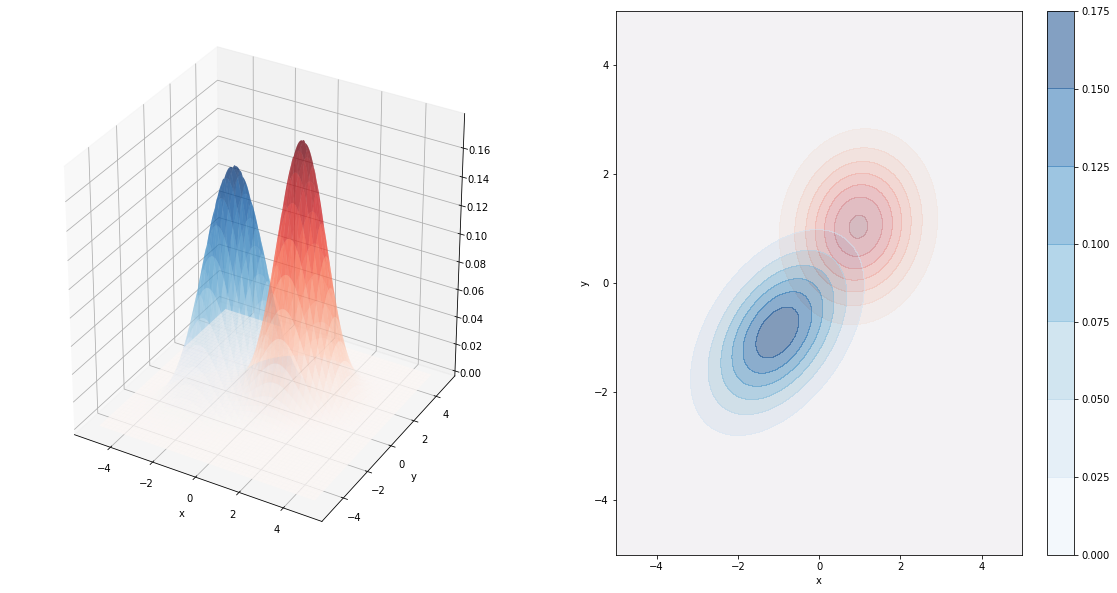

In [24]:
from matplotlib import cm

x,y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

mu1 = calculate_mu_1()
mu2 = calculate_mu_2()
cov1 = calculate_cov_1()
cov2 = calculate_cov_2()
rv1 = multivariate_normal(mean = mu1, cov = cov1)
rv2 = multivariate_normal(mean = mu2, cov = cov2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(x,y,rv1.pdf(pos), cmap=cm.Reds,alpha=0.5)
ax.plot_surface(x,y,rv2.pdf(pos), cmap=cm.Blues,alpha=0.5)

plt.subplot(122)
plt.contourf(x, y, rv1.pdf(pos), cmap=cm.Reds,alpha=0.5)
plt.contourf(x, y, rv2.pdf(pos), cmap=cm.Blues,alpha=0.5)

plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

#Visualize the posterior
Use the prior and the likelihood you've computed to obtain the posterior distribution for each class.

Like in the case of the likelihood above, make same similar surface and contour plots for the posterior.

## **Code explanation**

> x, y = np.mgrid[-5:5:.01, -5:5:.01]   

`to create a 3d graph from -5 to 5 with increment 0.01`

>pos = np.empty(x.shape + (2,))                                   
 
`Return a new array of given shape and type, with random values.
**X** having a shape: (1000, 1000)
**pos** having a shape: (1000,1000,2)
`
>pos[:, :, 0] = x          ## add 0 in 3 col <br/>
pos[:, :, 1] = y          ## add 1 in 3 col

> rv = multivariate_normal(mean = [0,0], cov = [[0.5, 0], [0, 0.5]])
<br/>

`Compute the Gaussian likelihood for each class
it takes 2 parameter` 
* Mean (point of highest density)
* covariance matrix

`Mean` contain [0 0] i.e. mean of feature x is 0 and the mean of feature y is 0

`covariance matrix` (2*2 Matrix) :
 [   0.5      0    ]
 [      0     0.5  ] 
Here 0.5 represent `variance(x)` and other diagonal 0.5 represent `variance(y)` 
Here 0 represent cov(x,y) in both digonal where i ≠ j

>fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
plt.xlabel('x')
plt.ylabel('y')

this is just increasing fig size and labeling the coordinates

>ax.plot_surface(x,y,rv.pdf(pos), cmap=cm.Blues)

`.pdf is probability density function`

we can use other methods also i.e.

`Methods`

* pdf(x, mean=None, cov=1)	Probability density function.

* logpdf(x, mean=None, cov=1)	Log of the probability density function.
* rvs(mean=None, cov=1)	Draw random samples from a multivariate normal distribution.
* entropy()	Compute the differential entropy of the multivariate normal.

Refer to this : 
[https://peterroelants.github.io/posts/multivariate-normal-primer/](https://peterroelants.github.io/posts/multivariate-normal-primer/)






Text(0, 0.5, 'y')

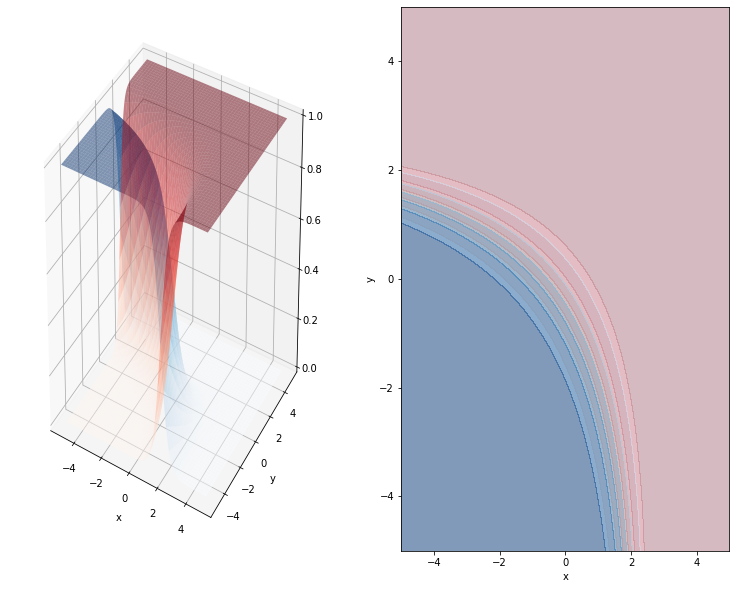

In [0]:
likelihood1 = rv1.pdf(pos)
likelihood2 = rv2.pdf(pos)

p1 = (likelihood1 * pi1)/(likelihood1*pi1+likelihood2*pi2)
p2 = (likelihood2 * pi2)/(likelihood1*pi1+likelihood2*pi2)

x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(131, projection='3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(x,y,p1, cmap=cm.Reds,alpha=0.5)
ax.plot_surface(x,y,p2, cmap=cm.Blues,alpha=0.5)
plt.subplot(132)
plt.contourf(x,y,p1,cmap=cm.Reds,alpha=0.5)
plt.contourf(x,y,p2,cmap=cm.Blues,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

# Decision boundary
1. Decision boundary can be obtained by $P(C_2|x)>P(C_1|x)$ in python. Use $\texttt{contourf}$ to plot the decision boundary. Use $\texttt{cmap=cm.Blues}$ and $\texttt{alpha=0.5}$
1. Also overlay the scatter plot of train data points from the 2 classes on the same plot. Use red color for class 1 and blue color for class 2 

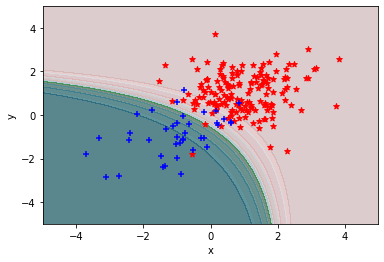

In [0]:
des = p2>p1
plt.contourf(x,y,p1,cmap=cm.Reds,alpha=0.5)
plt.contourf(x,y,p2,cmap=cm.Blues,alpha=0.5)
plt.contourf(x,y,des,cmap=cm.Greens,alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(class1_train[:,0],class1_train[:,1],marker='*',color='red')
plt.scatter(class2_train[:,0],class2_train[:,1],marker='+',color='blue')

# Test Data
Now let's use our trained model to classify test data points

1. $\texttt{test_data}$ contains the $x1,x2$ features of different data points
1. $\texttt{test_label}$ contains the true class of the data points. 0 means class 1. 1 means class 2.  
1. Classify the test points based on whichever class has higher posterior probability for each data point
1. Use $\texttt{classification_report}$ to test the classification performance

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/test').to_numpy()
test_data, test_label = test[:,:2], test[:,2]

test_data


array([[ 1.37207512,  1.00087579],
       [ 1.13446771, -0.09514382],
       [ 1.11339434,  0.01316996],
       [ 1.93318357,  0.36398445],
       [ 0.68312753,  2.03931788],
       [-0.28956938,  0.31659584],
       [ 1.75335633,  0.69004983],
       [ 2.08529292,  2.11275661],
       [ 0.77060916,  1.64236653],
       [ 0.73788903,  2.1239216 ],
       [-0.01708698,  1.37214814],
       [ 0.71365699,  2.1013301 ],
       [ 0.80868376,  0.37113499],
       [-1.73746849, -0.60752305],
       [ 2.58090126,  0.31839002],
       [ 1.32428999,  2.80084853],
       [ 2.62343964,  0.36262204],
       [ 0.68980609, -0.062727  ],
       [-0.1484162 , -1.31071993],
       [ 0.03040708,  0.59356914],
       [ 1.69509242,  1.39838686],
       [ 0.64172544,  2.34344673],
       [ 1.57998783,  0.23065933],
       [ 0.74123884,  0.98553624],
       [ 0.47491506,  1.17814125],
       [ 1.04177555, -0.43562168],
       [ 2.38647536,  1.05322906],
       [-1.05757087,  0.26217465],
       [ 0.45414078,

In [0]:
## likelihood 
l1 = rv1.pdf(test_data)
l2 = rv2.pdf(test_data)

In [0]:
##Posterior 
p1_test= (l1*pi1)/(l1*pi1+l2*pi2)
p2_test= (l2*pi2)/(l1*pi1+l2*pi2)

In [0]:
## Descision bundory 
test_data_predict=p2_test>p1_test
test_data_predict

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True])

In [0]:
test_data_predict = np.where(test_data_predict==True,1,0)
test_data_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1])

In [0]:
from sklearn.metrics import classification_report,accuracy_score

In [0]:
print(accuracy_score(test_label,test_data_predict))

0.8775510204081632


In [0]:
print(classification_report(test_label,test_data_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49

